In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#PART 1: UNREGULARISED MODELS

In [334]:
data=pd.read_csv("Data.csv")

Normalising the feature vector

In [404]:

X_mean = data['X'].mean()
X_std = data['X'].std()
data['X'] = (data['X'] - data['X'].mean()) / data['X'].std()
data['X'].describe()
X = data['X']
Y = data['Y']
X.describe()

,X
count,1.000000e+03
mean,-1.243450e-17
std,1.000000e+00
min,-1.729454e+00
25%,-8.647271e-01
50%,1.082034e-16
75%,8.647271e-01
max,1.729454e+00


In [405]:
data.head()

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955


In [407]:
data2 = data.sample(frac = 1,random_state = 8)
data2.head()

,X,Y
908,0.386054,-0.258751
265,0.354893,0.090196
627,-0.524549,1.466915
327,0.012118,0.765786
244,1.701755,4.989662


Splitting the dataset into 80% training data and 20% testing data

In [408]:
ratio = 0.8
train_size = int(ratio * len(data2))
train_data = data2[0:train_size]
test_data = data2[train_size:]
X_train = train_data['X']
Y_train = train_data['Y']
X_test = test_data['X']
Y_test = test_data['Y']
X_train.describe()

,X
count,800.000000
mean,-0.007280
std,0.998804
min,-1.729454
25%,-0.875114
50%,0.006925
75%,0.857802
max,1.729454


1000

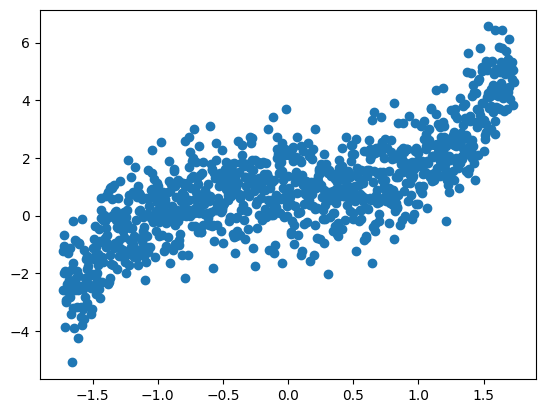

In [410]:
plt.scatter(X,Y)
X.shape[0]

This function converts the univariate feature vector to polynomial feature vector based on the degree given.

In [395]:
def polynomial_features(X,degree):

  X_polynomial = np.ones((X.shape[0], degree + 1))
  for i in range(1, degree + 1):
        X_polynomial[:, i] = np.power(X, i)
  return X_polynomial

We have to convert panda dataframes to numpy vectors for mathematical calculations.

In [396]:
X_train_numpy = X_train.to_numpy()
Y_train_numpy = Y_train.to_numpy()
X_test_numpy = X_test.to_numpy()
Y_test_numpy = Y_test.to_numpy()
# # X_poly = polynomial_features(X_train_numpy,9)
# print(X_poly)
# X_poly.shape[0]


Calculates gradient by linear algebra formulae.

In [397]:
def compute_gradient(X,Y,weight):
  m = X.shape[0]
  prediction = np.dot(X,weight)
  gradient = (np.dot(X.T,(prediction - Y)))/m
  return gradient

Implements gradient descent and returns the weight vector after 500 iterations.

In [398]:
def gradient_descent(X,Y,learning_rate,iterations):
  num_features = X.shape[1]
  m = X.shape[0]
  weight = np.zeros(num_features)
  for i in range(1,iterations+1):
    weight = weight - learning_rate * compute_gradient(X,Y,weight)
    if i % 100 == 0:  # Print every 100 iterations to track progress
            print(f"Iteration {i}, Weights: {weight}")  # Print weights
  prediction = np.dot(X,weight)
  cost = (np.square(prediction - Y)).mean()/2
  #cost = np.sqrt(np.mean(np.square(prediction - Y)))/2
  print(f"Final Cost: {cost}")
  return weight

We have displayed below performance of models corresponding to every degree from 1 to 9.(non-regularised)

In [399]:
weights_for_all_degrees = []
training_error = []
training_error = []
for i in range (1,10):
  print(f"\n\nPOLYNOMIAL OF DEGREE {i}\n")
  X_poly = polynomial_features(X_train_numpy,i)
  weight_vector = gradient_descent(X_poly,Y_train_numpy,0.0005,500)
  prediction = np.dot(X_poly,weight_vector)
  cost = (np.square(prediction - Y_train_numpy)).mean()/2
  training_error.append(cost)
  weights_for_all_degrees.append(weight_vector)




POLYNOMIAL OF DEGREE 1

Iteration 100, Weights: [0.04702576 0.06604124]
Iteration 200, Weights: [0.09178037 0.12888839]
Iteration 300, Weights: [0.13437352 0.18869593]
Iteration 400, Weights: [0.17490959 0.24561088]
Iteration 500, Weights: [0.21348792 0.29977313]
Final Cost: 1.5104987910748378


POLYNOMIAL OF DEGREE 2

Iteration 100, Weights: [0.04584525 0.06607451 0.04757597]
Iteration 200, Weights: [0.08731484 0.1290137  0.08907886]
Iteration 300, Weights: [0.12489865 0.18896067 0.12522218]
Iteration 400, Weights: [0.15903012 0.24605263 0.1566364 ]
Iteration 500, Weights: [0.19009273 0.30042111 0.18387866]
Final Cost: 1.4043112017774277


POLYNOMIAL OF DEGREE 3

Iteration 100, Weights: [0.04593369 0.0601656  0.0478037  0.1302763 ]
Iteration 200, Weights: [0.08762313 0.10731327 0.08988851 0.23354591]
Iteration 300, Weights: [0.12550174 0.14417248 0.12683913 0.31546962]
Iteration 400, Weights: [0.15996235 0.1728997  0.15919089 0.38051924]
Iteration 500, Weights: [0.19135995 0.1951988

Plot of how well every degree polynomial fits to the data.

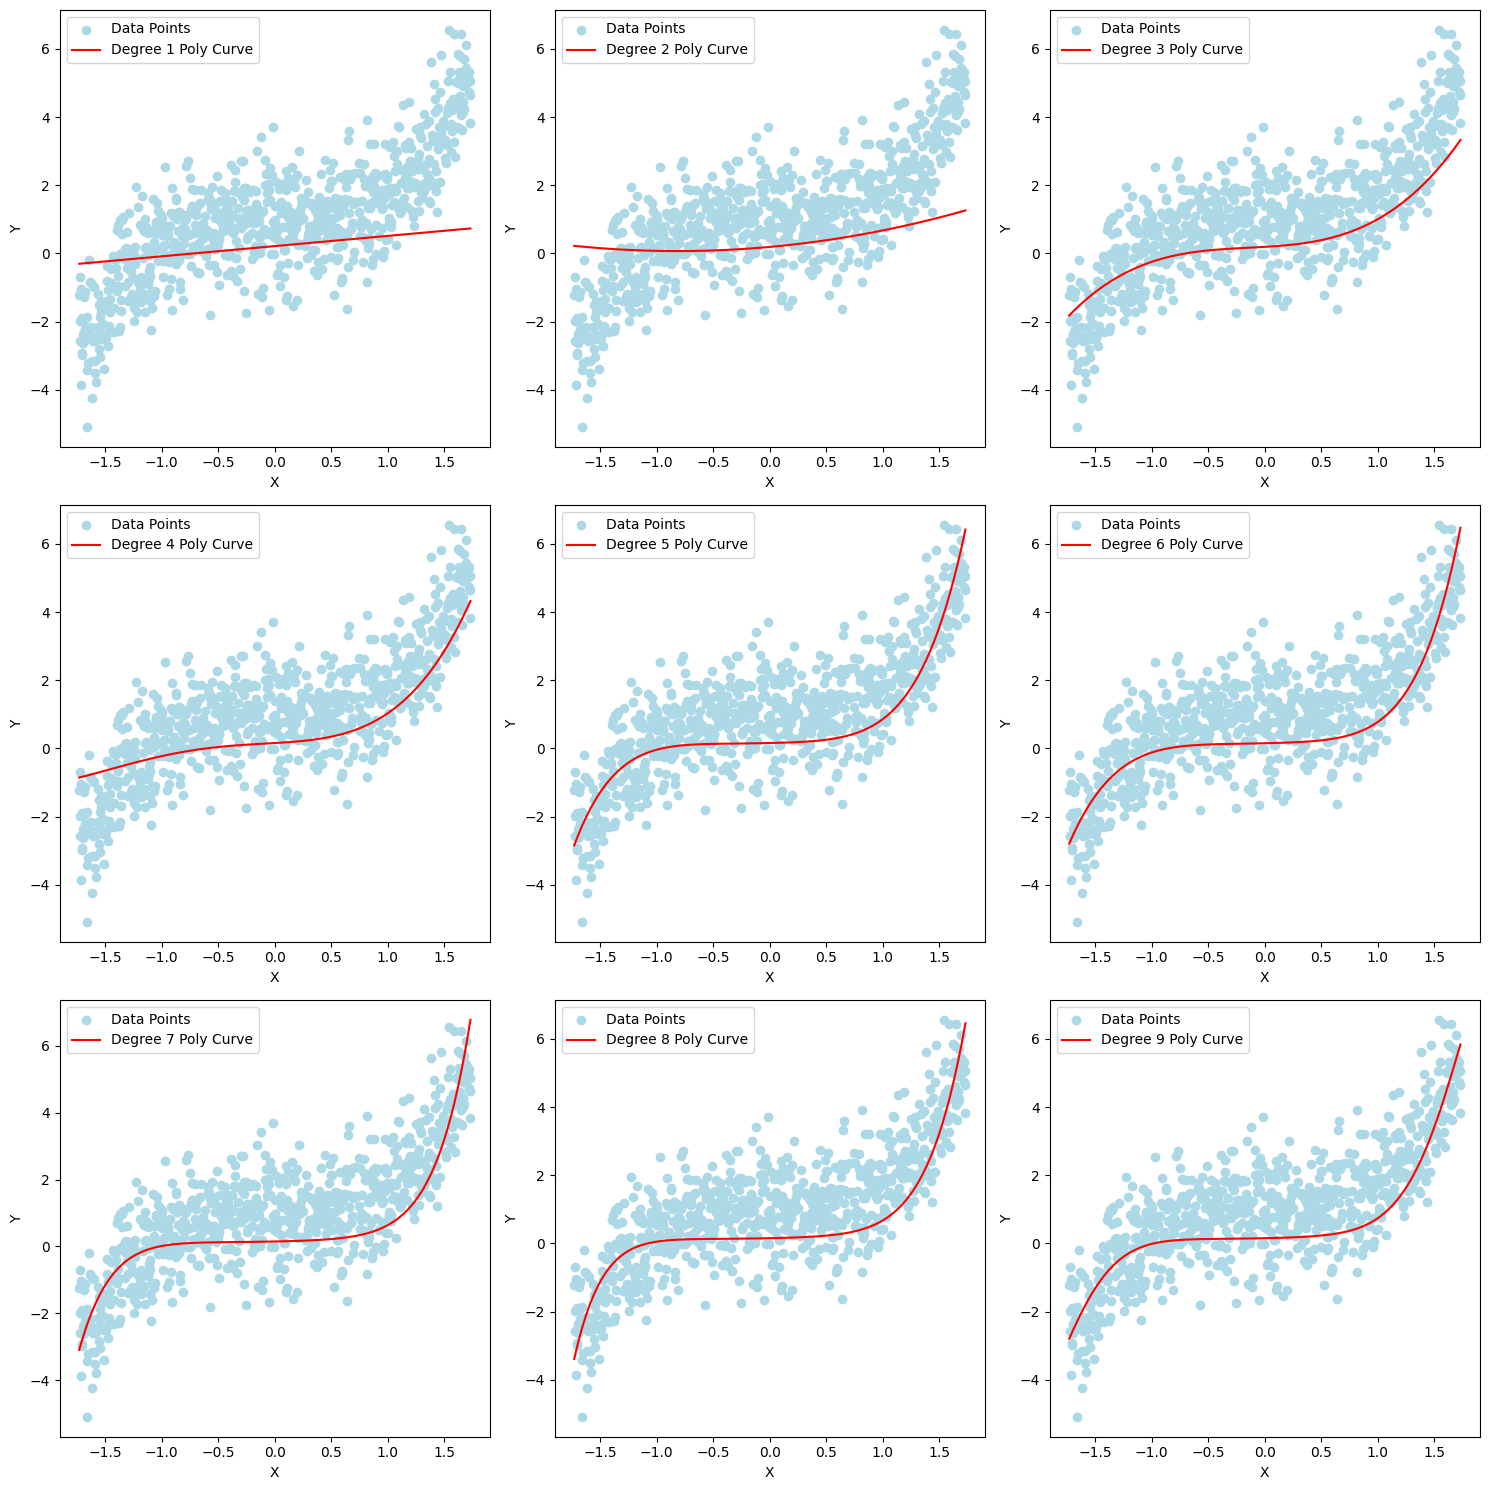

In [400]:
def plot(degree_list, weight_vectors):
    # Create a 3x3 grid for subplots
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axs = axs.ravel()

    for i, degree in enumerate(degree_list):
        ax = axs[i]  # Get the subplot for this degree

        # Scatter plot of the training data
        ax.scatter(X_train_numpy, Y_train_numpy, color='lightblue', label='Data Points')

        # Polynomial curve (using the weight vector from gradient descent)
        X_plot = np.linspace(min(X_train_numpy), max(X_train_numpy), 100)
        X_plot_poly = polynomial_features(X_plot, degree)
        Y_plot = np.dot(X_plot_poly,weight_vectors[i])  # Corresponding weight vector

        # Plot the polynomial regression curve
        ax.plot(X_plot, Y_plot, color='red', label=f'Degree {degree} Poly Curve')

        # Adding labels and a legend
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

degree_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
weight_vectors = weights_for_all_degrees  # Replace with actual weight vectors
plot(degree_list, weight_vectors)

Calculation of testing error.

In [401]:
test_error = []
for i in range(1,10):
  X_test_poly = polynomial_features(X_test_numpy,i)
  prediction = np.dot(X_test_poly,weights_for_all_degrees[i-1])
  error = np.mean(np.square(prediction - Y_test_numpy))/2
  test_error.append(error)

In [402]:
print(test_error)

[1.6563066896157128, 1.5359090726063693, 0.8254868715130638, 0.8044068053172039, 0.7139821318470868, 0.7287007028543571, 0.7877291644392888, 0.7717049842202937, 0.7235573836094301]


Text(0.5, 1.0, 'PLOT 1')

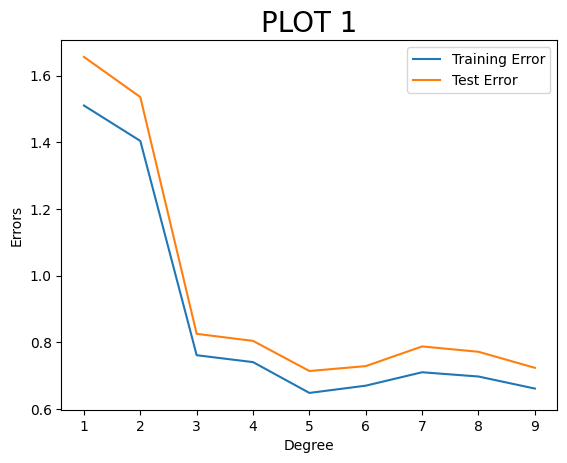

In [414]:
degree_list = [1,2,3,4,5,6,7,8,9]
plt.plot(degree_list,training_error,label = 'Training Error')
plt.plot(degree_list,test_error,label = 'Test Error')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Errors')
plt.title('PLOT 1',fontsize=20)

We can see that minimum error is observed at degree 5 and the value of the error is: 0.7139821318470868

# PART 2: REGULARISED MODELS

In [348]:
df=pd.read_csv("Data.csv")
X_mean=np.mean(df['X'])
X_std=np.std(df['X'])
df['X']=(df['X']-X_mean)/X_std
df['X']
df.head()

,X,Y
0,1.709535,5.098368
1,1.245345,2.516654
2,-0.698017,0.337961
3,0.185330,0.737320
4,0.597558,-0.780955


Creates a 60:20:20 split for training,validation and testing data.

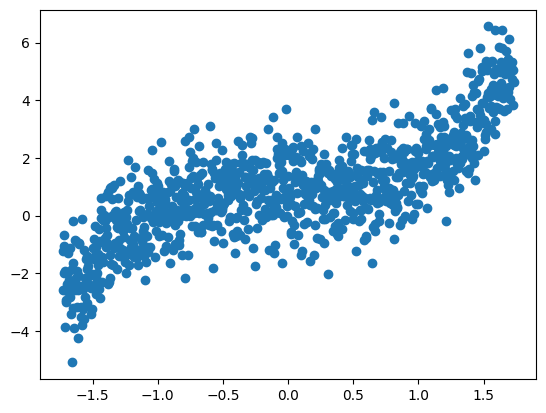

In [349]:
df=df.sample(frac=1,random_state=8)
train_len=int(0.6*len(df))
valid_len=int(0.8*len(df))
train_set=df[:train_len]
valid_set=df[train_len:valid_len]
test_set=df[valid_len:]
plt.scatter(x=df['X'],y=df['Y'])


In [350]:
def polynomial_x(X,degree):
  X_new=np.ones((X.shape[0],degree+1))
  for i in range(0,degree+1):
    X_new[:,i]=np.power(X,i)
  return X_new


This gradient function includes the regularisation term.

In [351]:
def gradient(X,Y,m,w,regularization_term):
  grad=(np.dot(X.T,np.dot(X,w)-Y))/m+(regularization_term*w)
  return grad

In [352]:
def find_loss(w,Y,X,regularization_term):
  y_predicted=np.dot(X,w)
  y_loss=np.mean((y_predicted-Y)**2)

  return y_loss

We used training error for bias and cross validation error as variance.

In [353]:
def find_variance(w,Y_val,X_val,regularization_term):
  predictions = np.dot(X_val, w)
  variance = np.mean((predictions - Y_val)**2)
  # variance-=find_bias(w,Y_train,X_train,regularization_term)
  return variance

In [354]:
def find_bias(w,Y,X,regularization_term):
    predictions = np.dot(X, w)

    # Calculate Bias
    bias_sq = np.mean((predictions - Y)**2)

    return bias_sq

This function returns the weight vector for a given value of learning rate,degree and regularisation constant.

In [355]:
def train_model(regularization_term,X,Y,degree,learn_rate=0.002):
  # np.seed(42)
  np.random.seed(42)
  w=np.random.rand((X.shape[1]))
  m=X.shape[0]
  iterations=500

  print(f"\nIterating for degree:{degree} for calculation weigth with lambda:{regularization_term}\n")
  for i in range(iterations+1):
    w=w-learn_rate*(gradient(X,Y,m,w,regularization_term))
    if np.isnan(w).any():
        print(f"NaN detected in weights at iteration {i}. Stopping training.")
        break
    if i==500:
      print(f"For degree:{degree} the weight vector after {i} iterations are :\n{w}\n")
  return w


In [357]:
def find_best_lambda(bias,variance,lambda1):

    total_errors=np.array(bias)+np.array(variance)
    optimal_index = np.argmin(total_errors)
    optimal_lambda = lambda1[optimal_index]

    return optimal_lambda

For every degree, we are finding the lambda value at which the bias^2 + variance value is minimised.

In [358]:
lambda1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
degree=9
best_lambda_for_all=[]
weight_of_all=[]

bias_all_degree=[]
variance_all_degree=[]
loss_all_degree=[]

for i in range(1, degree + 1):
    weight_ith_degree = {}
    X_poly = polynomial_x(train_set['X'].to_numpy(), i)
    X_poly_val = polynomial_x(valid_set['X'].to_numpy(), i)

    bias_ith_degree = []
    variance_ith_degree = []
    loss_ith_degree = []

    for regularization_term in lambda1:
        weight_vector = train_model(regularization_term, X_poly, train_set['Y'], i)
        weight_ith_degree[regularization_term] = weight_vector

        # Assuming find_bias, find_variance return scalar values
        bias = find_bias(weight_vector, train_set['Y'].to_numpy(), X_poly, regularization_term)
        variance = find_variance(weight_vector, valid_set['Y'].to_numpy(), X_poly_val, regularization_term)
        loss = bias + variance

        print(f"\n bias: {bias}")
        print(f" variance: {variance}")
        print(f" loss: {loss}\n")

        # Append to bias, variance, and loss for this degree
        bias_ith_degree.append(bias)        # Adds a value to bias list for this degree
        variance_ith_degree.append(variance)
        loss_ith_degree.append(loss)

    # Append the lists for this degree to their respective "all_degree" lists
    bias_all_degree.append(bias_ith_degree)        # bias_ith_degree is 1x9, this is added to bias_all_degree
    variance_all_degree.append(variance_ith_degree)
    loss_all_degree.append(loss_ith_degree)

    # Select the best lambda and store the corresponding weight vector
    lamda2 = find_best_lambda(bias_ith_degree, variance_ith_degree, lambda1)
    weight_of_all.append(weight_ith_degree[lamda2])
    best_lambda_for_all.append(lamda2)



Iterating for degree:1 for calculation weigth with lambda:0.1

For degree:1 the weight vector after 500 iterations are :
[0.71185074 1.16128524]


 bias: 1.4933782776857776
 variance: 1.2491380797441636
 loss: 2.742516357429941


Iterating for degree:1 for calculation weigth with lambda:0.2

For degree:1 the weight vector after 500 iterations are :
[0.67731605 1.09807083]


 bias: 1.5449254638253367
 variance: 1.2887023437527199
 loss: 2.8336278075780568


Iterating for degree:1 for calculation weigth with lambda:0.3

For degree:1 the weight vector after 500 iterations are :
[0.64518156 1.03960885]


 bias: 1.602291562880761
 variance: 1.3333669365911636
 loss: 2.9356584994719244


Iterating for degree:1 for calculation weigth with lambda:0.4

For degree:1 the weight vector after 500 iterations are :
[0.61525686 0.98550136]


 bias: 1.6637309751575613
 variance: 1.3816550568288954
 loss: 3.0453860319864567


Iterating for degree:1 for calculation weigth with lambda:0.5

For degree:1 t

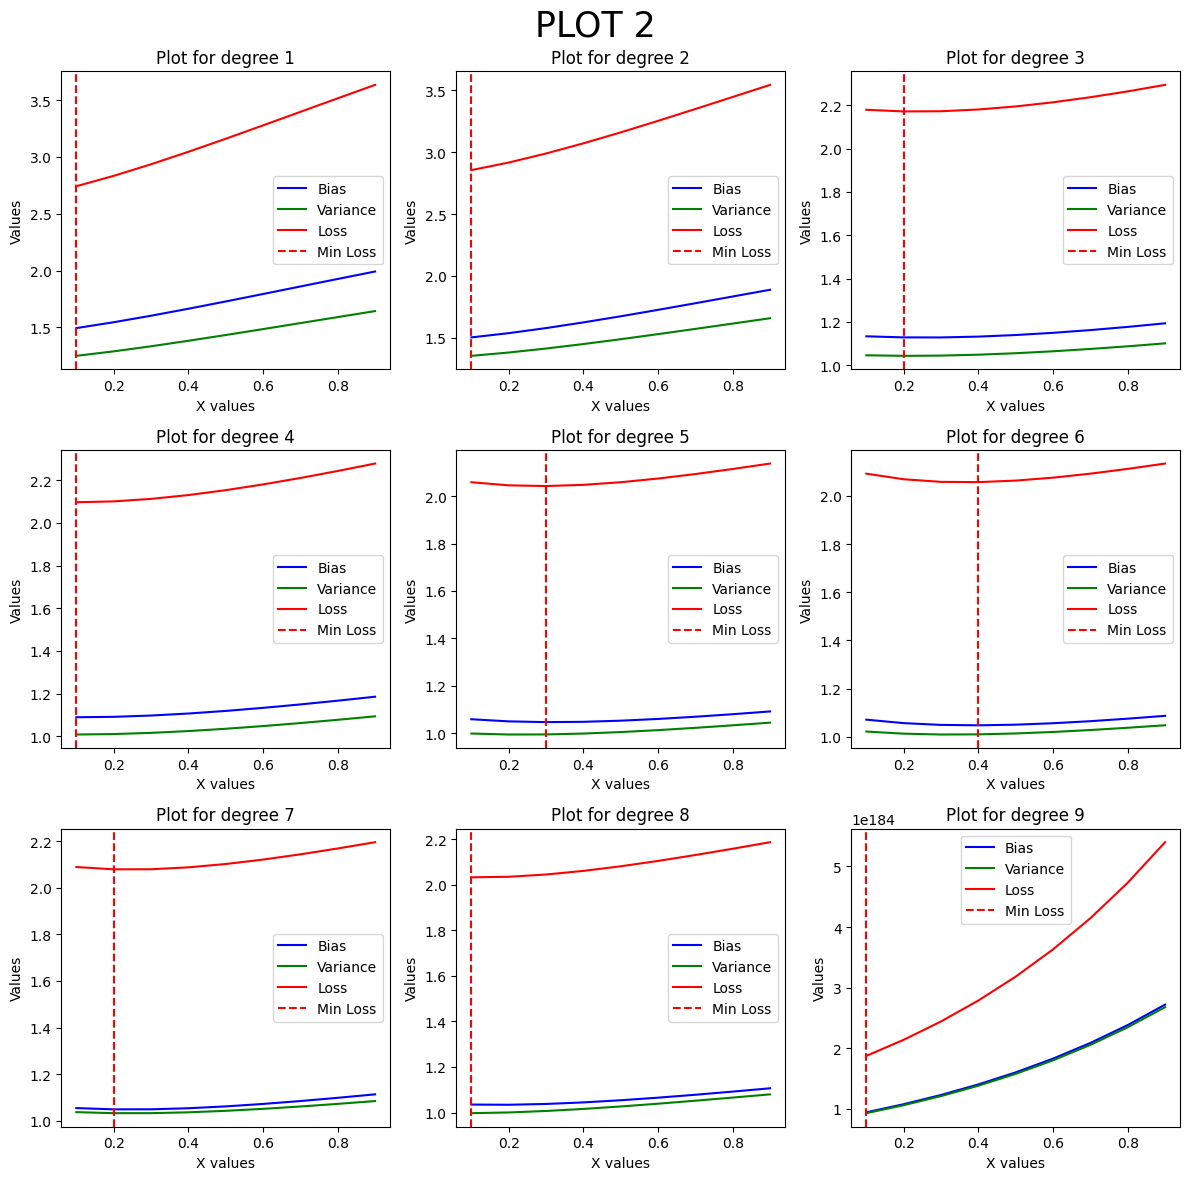

In [416]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.arange(0.1, 1.0, 0.1)  # x-axis: (0.1, 0.2, ..., 0.9)

# Create 3x3 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('PLOT 2',fontsize=25)
# Plot in each subplot
for i in range(9):
    row, col = divmod(i, 3)  # Calculate row and column index
    ax = axes[row, col]
    ax.set_title(f'Plot for degree {i+1}')
    # Plot bias, variance, and loss on the same plot
    ax.plot(x, bias_all_degree[i], label='Bias', color='b')
    ax.plot(x, variance_all_degree[i], label='Variance', color='g')
    ax.plot(x, loss_all_degree[i], label='Loss', color='r')

    # Find the x value where the loss is minimum
    min_loss_index = np.argmin(loss_all_degree[i])
    min_loss_x = x[min_loss_index]

    # Add a vertical line at the minimum loss
    ax.axvline(x=min_loss_x, color='r', linestyle='--', label='Min Loss')

    ax.set_xlabel("lambda values")
    ax.set_ylabel("Values")

    ax.legend()  # Add legend for bias, variance, loss

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



These are the weights corresponding for the best model for each degree polynomial.

In [361]:
weight_of_all

[array([0.71185074, 1.16128524]),
 array([0.39933958, 1.15440786, 0.42158205]),
 array([0.38799385, 0.63288096, 0.39784162, 0.43713031]),
 array([ 0.44932044,  0.67644038,  0.5802334 ,  0.43287461, -0.11660434]),
 array([ 0.40968591,  0.55190001,  0.49725145,  0.33483929, -0.07682915,
         0.07908792]),
 array([ 0.3767691 ,  0.50620414,  0.47817601,  0.31455503,  0.0483613 ,
         0.09482189, -0.04499366]),
 array([ 0.41169008,  0.62756106,  0.5609204 ,  0.33130667,  0.04236659,
        -0.14256633, -0.05912314,  0.08396487]),
 array([ 0.45117739,  0.68386856,  0.63214878,  0.35458584,  0.03938256,
        -0.17037347, -0.17809461,  0.08734693,  0.0408978 ]),
 array([-2.42778226e+87, -5.40934543e+88, -6.47279363e+87, -1.37050827e+89,
        -1.78920141e+88, -3.56394687e+89, -5.03854342e+88, -9.44478478e+89,
        -1.43299512e+89, -2.53924074e+90])]

These are the best lambda values for each degree polynomial models.

In [362]:
best_lambda_for_all

[0.1, 0.1, 0.2, 0.1, 0.3, 0.4, 0.2, 0.1, 0.1]

We are using the testing set to decide which is the best model among the 9 models we found prior.

In [363]:
curr_test_error = float('inf')
best_index = 0
for i in range(1,degree+1):
  X_poly_test=polynomial_x(test_set['X'].to_numpy(),i)
  prediction = np.dot(X_poly_test,weight_of_all[i-1])
  error = np.mean(np.square(prediction - test_set['Y'].to_numpy()))/2
  if error < curr_test_error:
    curr_test_error = error
    best_index = i
  print(f"The testing error for degree {i} is {error}")
best_weight = weight_of_all[best_index]
best_degree = best_index+1
best_lambda = best_lambda_for_all[best_index]

The testing error for degree 1 is 0.790016948267199
The testing error for degree 2 is 0.803340049355254
The testing error for degree 3 is 0.6258915140888678
The testing error for degree 4 is 0.6073615441186007
The testing error for degree 5 is 0.5913864770975067
The testing error for degree 6 is 0.5948008970082822
The testing error for degree 7 is 0.6083149774823727
The testing error for degree 8 is 0.6040947246692273
The testing error for degree 9 is 3.7487241953737e+183


These are the details of the final best polynomial model out of 9 models we found prior.

In [364]:
print(f"The best model is of degree is {best_index}")
print(f"The best model has weights {weight_of_all[best_index]}")
print(f"The best model has lambda value {best_lambda_for_all[best_index]}")
print(f"The best model has testing error {curr_test_error}")
print(best_index)

The best model is of degree is 5
The best model has weights [ 0.3767691   0.50620414  0.47817601  0.31455503  0.0483613   0.09482189
 -0.04499366]
The best model has lambda value 0.4
The best model has testing error 0.5913864770975067
5


Plotting the best polynomial model.

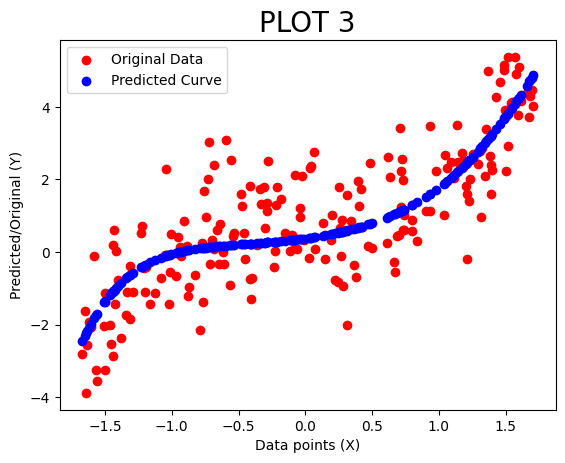

In [417]:
# Assuming test_set['X'] contains the original data points and Y_predicted has the predicted values.

X_poly = polynomial_x(test_set['X'].to_numpy(), best_degree)
Y_predicted = np.dot(X_poly, best_weight)

# Plot original data points as scatter plot
plt.scatter(test_set['X'], test_set['Y'], color='red', label='Original Data')

# Plot predicted curve
plt.scatter(test_set['X'], Y_predicted, color='blue', label='Predicted Curve')

# Add labels and title
plt.xlabel("Data points (X)")
plt.ylabel("Predicted/Original (Y)")
plt.title("Original Data vs Predicted Curve")

# Show legend
plt.legend()
plt.title('PLOT 3',fontsize=20)
# Display plot
plt.show()


## **Best fit model on data points given **




---


1.Best_degree=5


---


2.Regularization_term=0.4

---




3.Minimum loss (MSE)=Bias_sq+Variance= 0.59138647709750675

---



# 3D plots for all 9 models of degree (1 to 9) for different hyperparameters


In [366]:
mse_error={}

learn_rate=np.linspace(0.0001,0.001,10)
lambda1=[0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in range(1,10):  # Degree loop
    mse_error[i] = {}
    for regularization_term in lambda1:  # Regularization loop
        mse_error[i][regularization_term] = {}
        for learning_rate in learn_rate:  # Learning rate loop
            # Initialize with 0
            mse_error[i][regularization_term][learning_rate] = 0
for i in range(1,degree+1):
  weight_ith_degree={}
  X_poly=polynomial_x(train_set['X'].to_numpy(),i)

  X_poly_test=polynomial_x(test_set['X'].to_numpy(),i)

  for regularization_term in lambda1:
    for learning_rate in learn_rate:
      weight_vector=train_model(regularization_term,X_poly,train_set['Y'],i,learning_rate)
      mse_error[i][regularization_term][learning_rate]=find_loss(weight_vector,test_set['Y'].to_numpy(),X_poly_test,regularization_term)


Streaming output truncated to the last 5000 lines.
Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 iterations are :
[0.36560631 0.91586811 0.69708112 0.54863718]


Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 iterations are :
[0.3589014  0.88686636 0.6659553  0.51047656]


Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 iterations are :
[0.35410583 0.86245366 0.63812473 0.48157636]


Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 iterations are :
[0.35094527 0.84164734 0.61316678 0.45990216]


Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 iterations are :
[0.34918387 0.82367837 0.59071748 0.44386259]


Iterating for degree:3 for calculation weigth with lambda:0.1

For degree:3 the weight vector after 500 

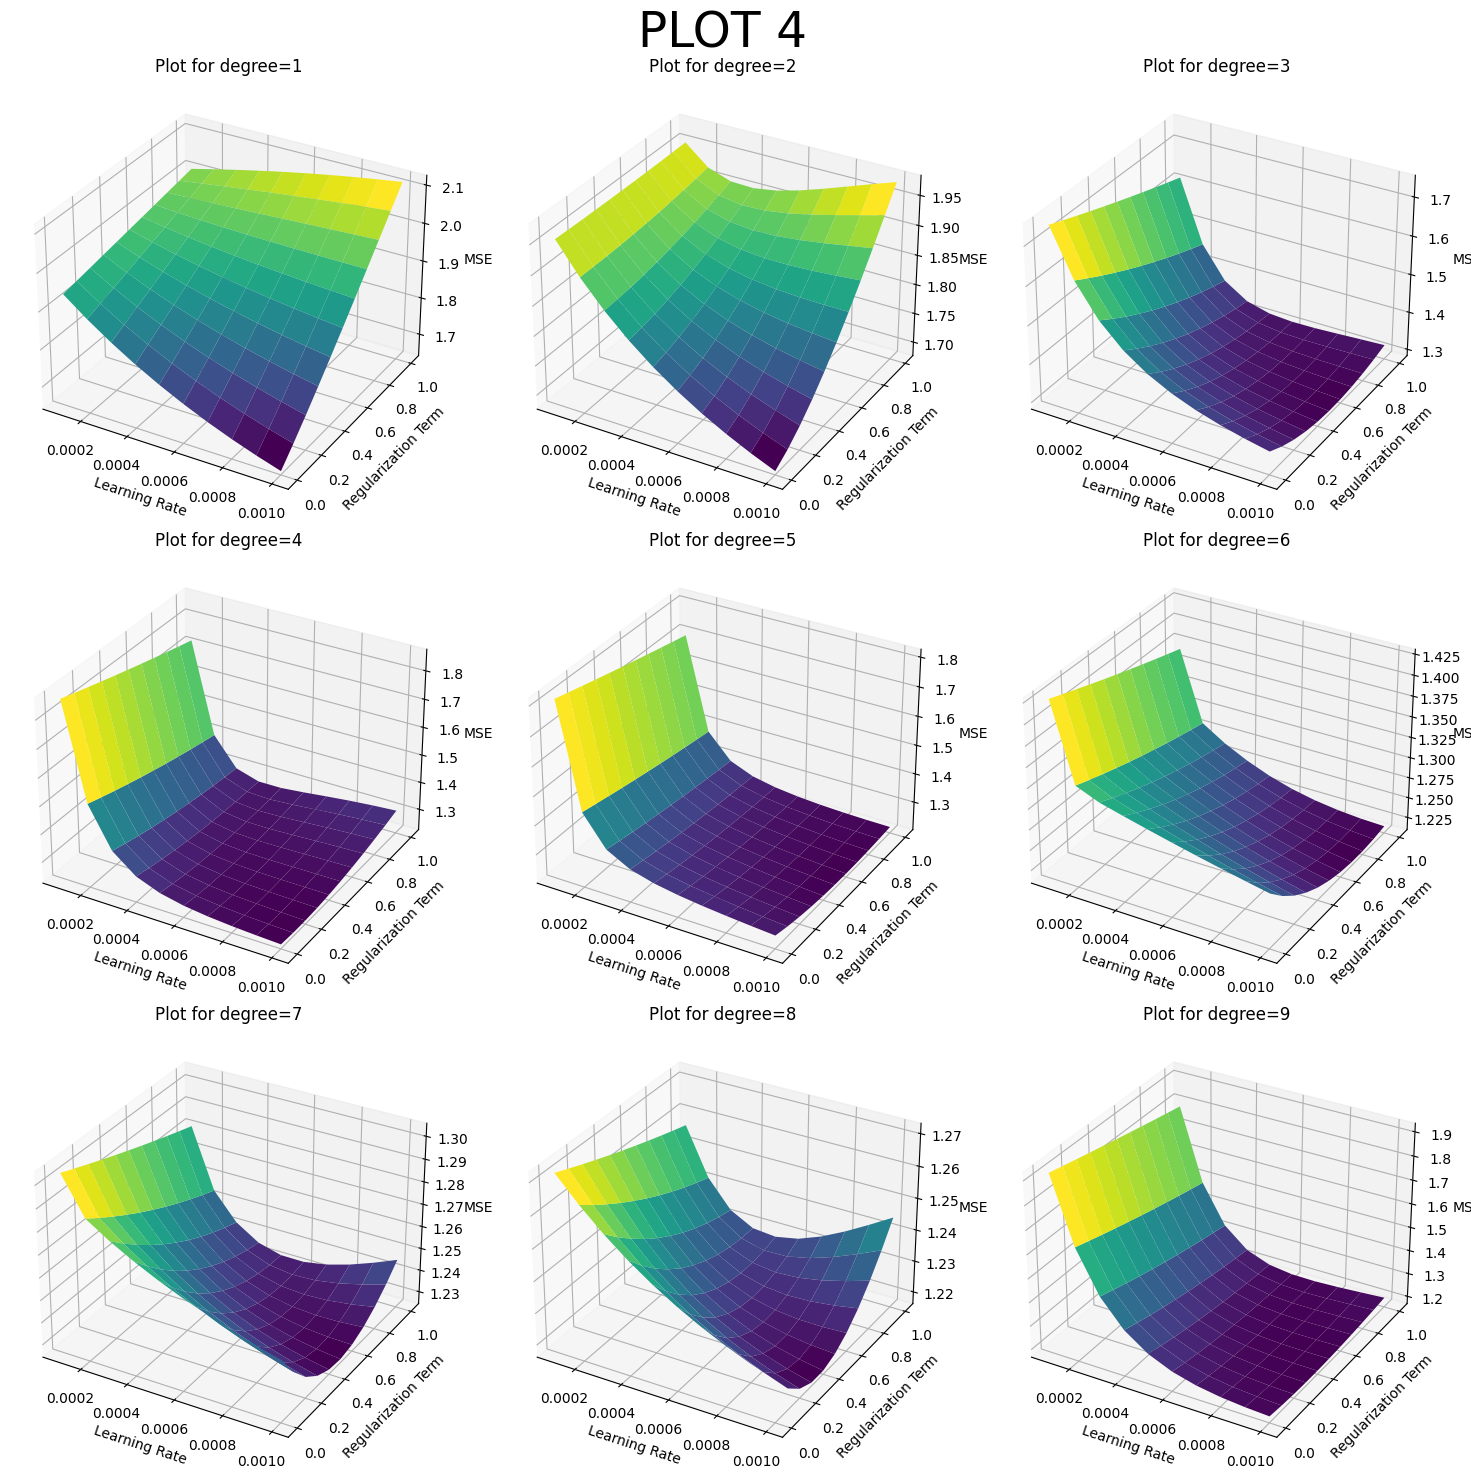

In [419]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create subplots in a 3x3 grid
fig, axs = plt.subplots(3, 3, subplot_kw={'projection': '3d'}, figsize=(15, 15))
fig.suptitle('PLOT 4',fontsize=35)
# Flatten axs for easy iteration
axs = axs.flatten()

for i in range(1,10):  # For each subplot
    ax = axs[i-1]

    # Extract data for ith plot
    reg_terms = list(mse_error[i].keys())
    learn_rates = list(mse_error[i][reg_terms[0]].keys())

    X, Y = np.meshgrid(learn_rates, reg_terms)
    Z = np.array([[mse_error[i][reg_term][learn_rate] for learn_rate in learn_rates] for reg_term in reg_terms])

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Set labels
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Regularization Term')
    ax.set_zlabel('MSE')
    ax.set_title(f'Plot for degree={i}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
